### The Correlation Coefficient

The correlation coefficient measures the extent to which the relationship between two variables is linear. It's value is always between -1 and 1. A positive coefficient indicates that the variables are directly related. A negative coefficient indicates that the variables are inversely related, when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the two.

The Correlation Coefficient of `X` and `Y` is defined as $r = \frac{Cov(X,Y)}{std(X)std(Y)}$

#### Correlation vs Covariance

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [12]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

0.1703135750570262

In [13]:
# Compare the correlation and covariance of two series.
X = np.random.rand(50)
Y = 2 * X + 4

print("Covariance of X and Y: \n" + str(np.cov(X, Y)))
print("Correlation of X and Y: \n" + str(np.corrcoef(X, Y)))

Covariance of X and Y: 
[[0.08948498 0.17896995]
 [0.17896995 0.3579399 ]]
Correlation of X and Y: 
[[1. 1.]
 [1. 1.]]


Both np.cov and np.corrcoef return matrices because for each input variable we have one row and one column. The diagonal is just the variance of that variable. 

In [14]:
cov_matrix = np.cov(X, Y)

error = cov_matrix[0, 0] - X.var(ddof=1)

print("error:", str(error))

error: -2.7755575615628914e-17


Correlation:  -0.0315442479128924
Built-in Correlation:  -0.030913362954634555


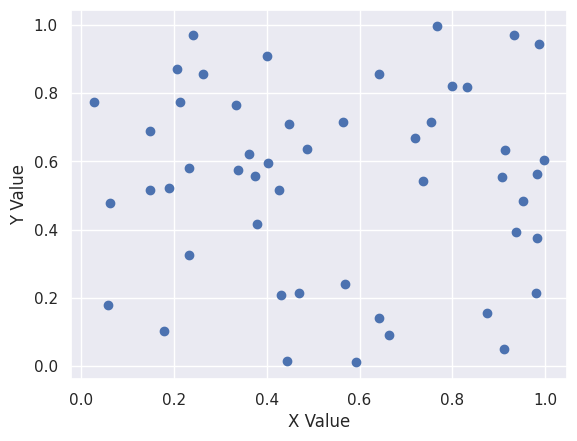

In [15]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X, Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print('Correlation: ', np.cov(X, Y)[0, 1] / (np.std(X) * np.std(Y)))

print("Built-in Correlation: ", str(np.corrcoef(X, Y)[0, 1]))

Two correlated sets of data

Correlation: 0.9372225860682006


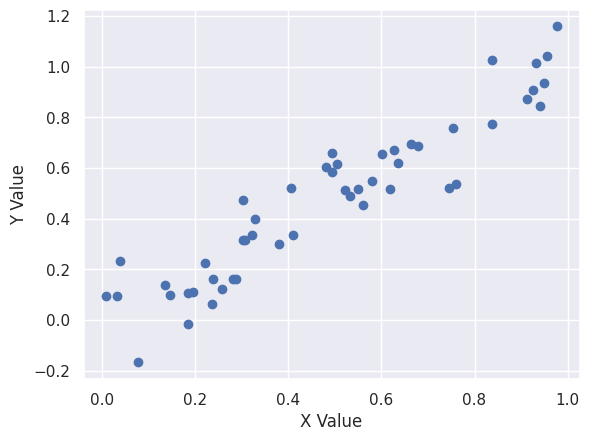

In [16]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", np.corrcoef(X, Y)[0, 1])

Introduce some noise

Correlation: 0.8327046468749839


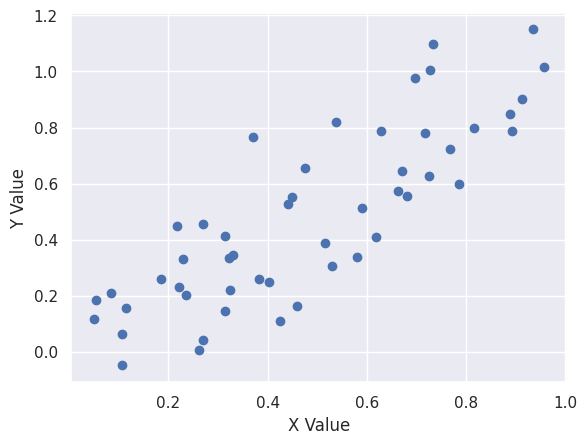

In [17]:
X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", str(np.corrcoef(X, Y)[0, 1]))

Inverse relationship 

Correlation: -0.9270265309876381


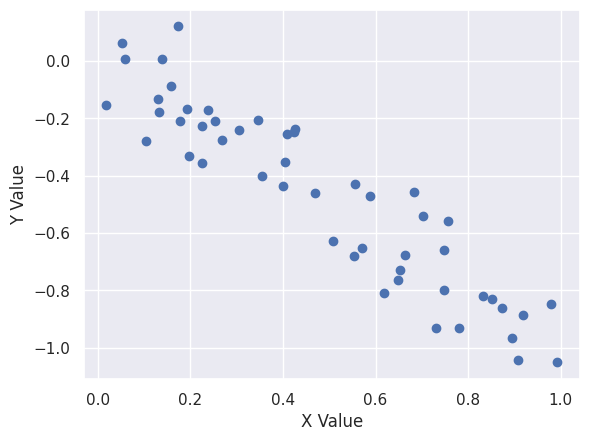

In [18]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.scatter(X, Y)
plt.xlabel("X Value")
plt.ylabel("Y Value")

print("Correlation:", np.corrcoef(X, Y)[0, 1])

#### How is this useful in finance?

Determining related assets

In [19]:
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Correlation coefficients
LRCX and AAPL: 0.9595012060897243
LRCX and SPY: 0.9339471145116784
AAPL and SPY: 0.9007672649733823


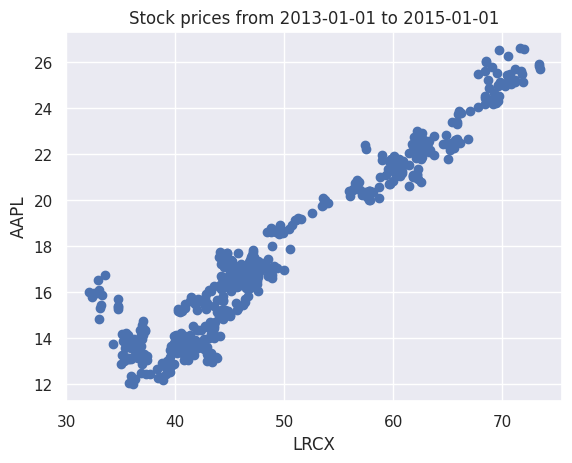

In [20]:
start = '2013-01-01'
end = '2015-01-01'
bench = yf.download('^GSPC', start=start, end=end)['Adj Close']
a1 = yf.download('LRCX', start=start, end=end)['Adj Close']
a2 = yf.download('AAPL', start=start, end=end)['Adj Close']

plt.scatter(a1, a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print("Correlation coefficients")
print("LRCX and AAPL:", np.corrcoef(a1, a2)[0, 1])
print("LRCX and SPY:", np.corrcoef(a1, bench)[0, 1])
print("AAPL and SPY:", np.corrcoef(bench, a2)[0, 1])

Constructing a portfolio of uncorrelated assets

It's really hard to determine whether or not a correlation is significant, especially when they are not normally distributed.
As an example, remember that the correlation of AAPL and LRCX was 0.95. let's take the rolling 60 day correlation between the two to see how that varies.

Text(0, 0.5, '60-day Rolling Correlation')

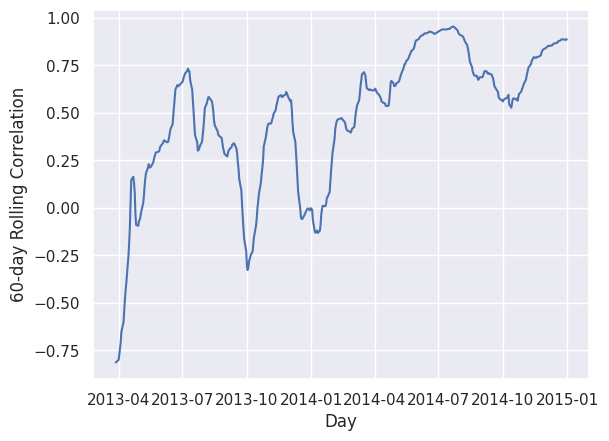

In [23]:
rolling_correlation = a1.rolling(60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

##### Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different ways.
Additionally, the correlation coefficient can be very sensitive to outliers. Including or excluding even a couple of datapoints can alter the result.

0.14534862404047796

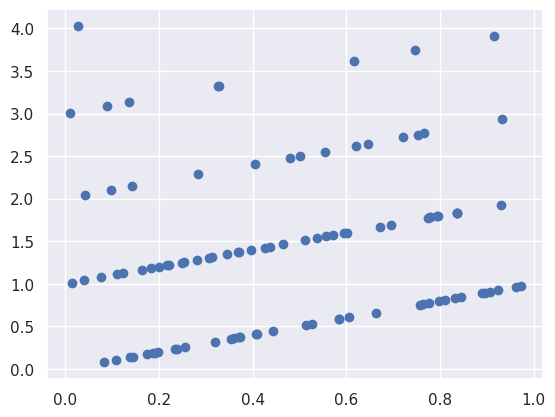

In [28]:
# Noise distribution poisson
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

### Exercises